# Visualizations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append('../../ranky')
import ranky as rk

In [93]:
# Utilities

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', (0.2, 0.2, 0.4), '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) # '#252545'

def get_df(df, name):
    m = df[df['name'] == name]
    m = m.drop(['name'], axis=1)
    try:
        m = m.drop(['Ex Aequo'], axis=0) # Random', 
    except:
        pass
    return m

def barplot(results, show_std=False, reverse=False, ylabel='Rank correlation', legend=True, title=None):
    fig, ax = plt.subplots(figsize=(6, 3), dpi=80)
    # Bars
    all_bars = np.array([rk.score(get_df(results, name)) for name in da_names]).T
    if reverse:
        all_bars = [1 - x for x in all_bars]
    # Other aggregation
    # all_bars = np.array([rk.condorcet(get_df(results, name)) for name in da_names]).T
    if show_std:
        all_stds = np.array([np.std(get_df(results, name), axis=1) for name in da_names]).T
    barWidth = 0.15
    error_kw = dict(lw=1, capsize=2, capthick=1, alpha=0.5)
    all_r = [np.arange(len(all_bars[0])) + barWidth * i for i in range(len(all_bars))]
    index = get_df(results, 'AutoDL-AUC').index
    # Display
    for i in range(len(all_bars)):
        # all_bars[i] -> score bars on one da matrix
        if show_std:
            ax.bar(all_r[i], all_bars[i], width=barWidth, edgecolor='white', label=index[i], yerr=all_stds[i], error_kw=error_kw)
        else:
            ax.bar(all_r[i], all_bars[i], width=barWidth, edgecolor='white', label=index[i])
    # Parameters
    ax.set_xlabel('Benchmarks', fontweight='bold')
    ax.set_ylabel(ylabel)
    #ax.set_ylim((-0.16, 0.81))
    ax.set_xticks([r + barWidth for r in range(len(all_bars[0]))])
    ax.set_xticklabels(da_names, rotation=45)
    ax.set_facecolor('#EAEAF2')  
    ax.grid(True, axis='y', color='white')
    ax.set_axisbelow(True)
    if title is not None:
        plt.title(title)
    # Legend
    if legend:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [3]:
folder = '../data/results'
da_names = ['AutoDL-AUC', 'AutoDL-ALC', 'AutoML', 'Artificial', 'OpenML', 'Statlog']
methods = ['Mean', 'Median', 'Average rank', 'Success rate', "Copeland's method", 'Relative difference'] # 'Random', , 

In [4]:
# Load results
#gen_j_rank = pd.read_csv(os.path.join(folder, 'generalization_judge_ranking.csv'), index_col=0).drop(['Random'])
#gen_j_win = pd.read_csv(os.path.join(folder, 'generalization_judge_winner.csv'), index_col=0).drop(['Random'])
gen_c_rank = pd.read_csv(os.path.join(folder, 'generalization_candidate_ranking.csv'), index_col=0).drop(['Random'])
#gen_c_win = pd.read_csv(os.path.join(folder, 'generalization_candidate_winner.csv'), index_col=0).drop(['Random'])
stab_j_rank = pd.read_csv(os.path.join(folder, 'stability_judge_ranking.csv'), index_col=0).drop(['Random'])
#stab_j_win = pd.read_csv(os.path.join(folder, 'stability_judge_winner.csv'), index_col=0).drop(['Random'])
stab_c_rank = pd.read_csv(os.path.join(folder, 'stability_candidate_ranking.csv'), index_col=0).drop(['Random'])
#stab_c_win = pd.read_csv(os.path.join(folder, 'stability_candidate_winner.csv'), index_col=0).drop(['Random'])
#condorcet_rate = pd.read_csv(os.path.join(folder, 'condorcet_winner_rate.csv'), index_col=0).drop(['Random'])
#majority_rate = pd.read_csv(os.path.join(folder, 'majority_winner_rate.csv'), index_col=0).drop(['Random'])
#avr_winner = pd.read_csv(os.path.join(folder, 'avr_winner.csv'), index_col=0).drop(['Random'])

In [53]:
#gen_c_rank = gen_c_rank.drop(['Success rate'], axis=0)
#stab_j_rank = stab_j_rank.drop(['Success rate'], axis=0)
#stab_c_rank = stab_c_rank.drop(['Success rate'], axis=0)
#condorcet_rate = condorcet_rate.drop(['Success rate'], axis=0)
#avr_winner = avr_winner.drop(['Success rate'], axis=0)

# Generalization

##### Judge perturbation

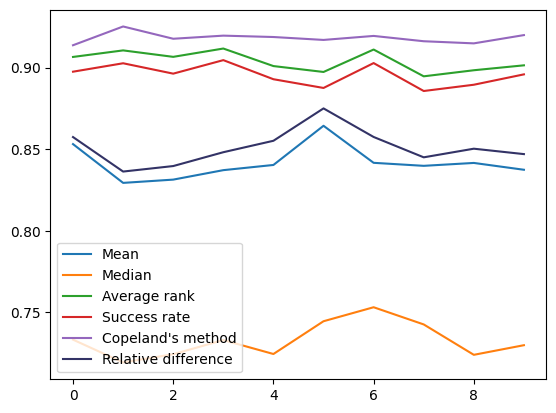

In [10]:
# Example plot
results = stab_j_rank
df = results[results['name'] == 'AutoDL-AUC']
df = df.drop(['name'], axis=1)

x = range(df.shape[1])
for ranking_function in df.index:
    y = df.loc[ranking_function]
    plt.plot(x, y, label=ranking_function)
plt.legend()
plt.show()

In [6]:
#barplot(gen_j_rank, show_std=True)

In [7]:
#barplot(gen_j_win, show_std=True, reverse=True, ylabel='Winner correlation')

In [6]:
rk.success_rate(df.loc["Copeland's method"], df.loc["Success rate"])

1.0

##### + Candidate perturbation

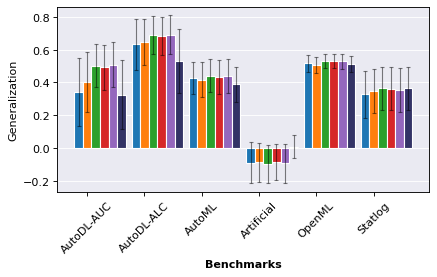

In [96]:
barplot(gen_c_rank, show_std=True, legend=False, ylabel='Generalization')

In [11]:
#barplot(gen_c_win, show_std=True, reverse=True, ylabel='Winner correlation')

# Stability

##### Judge perturbation

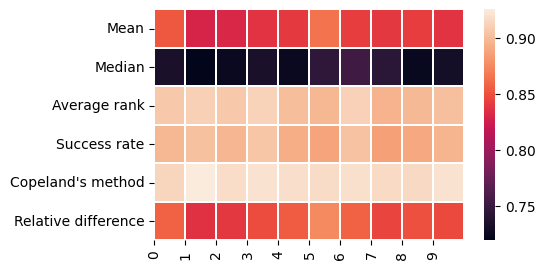

In [81]:
rk.show(get_df(stab_j_rank, 'AutoDL-AUC'))

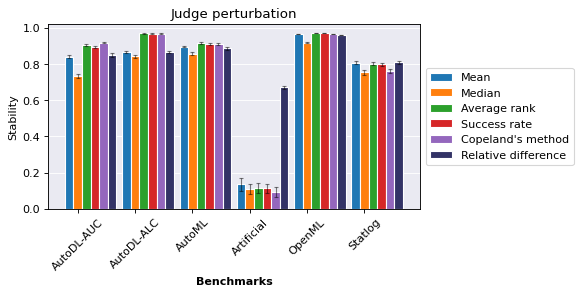

In [94]:
barplot(stab_j_rank, show_std=True, title='Judge perturbation', ylabel='Stability')

In [14]:
#barplot(stab_j_win, show_std=True, reverse=True, ylabel='Winner correlation')

##### Candidate perturbation

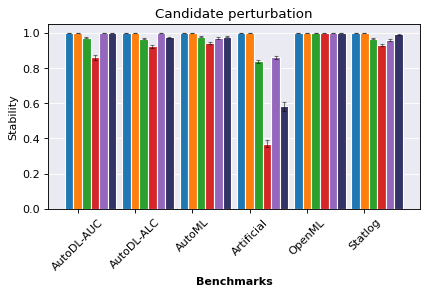

In [95]:
barplot(stab_c_rank, show_std=True, legend=False, title='Candidate perturbation', ylabel='Stability')

In [16]:
#barplot(stab_c_win, show_std=True, reverse=True, ylabel='Winner correlation')

# Winner rates

##### Condorcet winner

In [686]:
#barplot(condorcet_rate)

##### Majority winner

In [409]:
#barplot(majority_rate)

##### Average rank of winner

In [777]:
ts = pd.Series(np.mean([get_df(avr_winner, name).mean(axis=1) for name in da_names if len(get_df(avr_winner, name)) > 0], axis=0))
ts.index = get_df(avr_winner, 'AutoDL-AUC').mean(axis=1).index
ts

Mean                   0.682774
Median                 0.700490
Average rank           0.735220
Success rate           0.732797
Copeland's method      0.729861
Relative difference    0.729680
dtype: float64

# ALL

### Mean

In [65]:
# /!\ if len(get_df(df, name)) > 0 /!\

In [88]:
cm = sns.light_palette((0.59, 0.6, 0.88), as_cmap=True)

In [195]:
def drop_methods(m):
    try:
        m = m.drop(['Ex Aequo'], axis=0) # , 'Random']
    except:
        pass
    return m

# Don't take into account Artificial benchmark for Condorcet rate (too few cases)
condorcet_rate = condorcet_rate[condorcet_rate['name'] != 'Artificial']

# remove random
#table = table.drop(['Random'], axis=0)

Standard deviation

In [206]:
table = [avr_winner, condorcet_rate, gen_c_rank, stab_j_rank, stab_c_rank] # gen_j_rank, gen_j_win,  , gen_c_win stab_j_win stab_c_win
table = [drop_methods(m) for m in table]
# Mean
table = [np.mean([np.std(get_df(df, name), axis=1) for name in da_names if len(get_df(df, name)) > 0], axis=0) for df in table]
# Format
table = pd.DataFrame(table)
table.index = ['avr', 'condorcet', 'gen_c_rank', 'stab_j_rank', 'stab_c_rank']
table.columns = methods
table = table.T
rnd = pd.Series([2, 1, 2, 3, 3], index=table.columns)
#for i in range(len(table.columns)):
#    if (i%2 != 0) and i > 1: # reverse winner distance
#        table[table.columns[i]] = 1 - table[table.columns[i]]
std_table = table  / np.sqrt(5)
std_table = std_table.round(rnd)

In [207]:
table = [avr_winner, condorcet_rate, gen_c_rank, stab_j_rank, stab_c_rank] # gen_j_rank, gen_j_win,  , gen_c_win stab_j_win stab_c_win
table = [drop_methods(m) for m in table]
# Mean
table = [np.mean([np.mean(get_df(df, name), axis=1) for name in da_names if len(get_df(df, name)) > 0], axis=0) for df in table]
# Format
table = pd.DataFrame(table)
table.index = ['avr', 'condorcet', 'gen_c_rank', 'stab_j_rank', 'stab_c_rank']
table.columns = methods
table = table.T
#for i in range(len(table.columns)):
#    if (i%2 != 0) and i > 1: # reverse winner distance
#        table[table.columns[i]] = 1 - table[table.columns[i]]
table = table.round(rnd)

In [208]:
# Display STD
#for i in range(table.shape[0]):
#    for j in range(table.shape[1]):
#        table.iloc[i,j] = str(table.iloc[i][j]) + ' ± ' + str(std_table.iloc[i][j])

In [209]:
# sort, rename, etc.
table.columns = ['Winner rank', 'Condorcet rate', 'Generalization', 'Stability (judge)', 'Stability (candidate)']
# add kemeny young
#new_row = pd.Series(data={'Winner rank':np.nan, 'Condorcet rate':np.nan, 'Generalization':np.nan, 'Stability (judge)':np.nan, 'Stability (candidate)':np.nan}, name='Kemeny-Young')
#table = table.append(new_row)
# reorder
table = table.reindex(['Mean', 'Median', 'Average rank', 'Success rate', 'Relative difference', "Copeland's method"]) # , 'Success rate' , 'Kemeny-Young'
# rename
table.index = ['Mean', 'Median', 'Average rank', 'Success rate', 'Relative diff.', 'Copeland']

In [210]:
def reverse_str(table):
    table = table.copy()
    for i in range(table.shape[0]):
        #for j in range(table.shape[1]):
        try:
            table.iloc[i] = float(table.iloc[i].split(' ± ')[0]) # ,j [j]
        except:
            pass
    return table.astype(float)

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

def background_gradient(s, cmap='PuBu', low=0, high=0):
        s = reverse_str(s)
        rng = s.max() - s.min()
        norm = colors.Normalize(s.min() - (rng * low),
                                s.max() + (rng * high))
        normed = norm(s.values)
        c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
        return ['background-color: %s' % color for color in c]
ff = pd.Series(['{:.'+str(x)+'f}' for x in [2, 1, 2, 3, 3]], index=table.columns)
s = table.style.apply(background_gradient, cmap=cm, low=0, high=0).format(ff.to_dict()) #.set_precision(2) # .format("{:.2}")
s

,Winner rank,Condorcet rate,Generalization,Stability (judge),Stability (candidate)
Mean,0.68,0.4,0.36,0.753,1.000
Median,0.70,0.5,0.37,0.702,1.000
Average rank,0.74,0.8,0.41,0.780,0.954
Success rate,0.73,0.8,0.40,0.777,0.839
Relative diff.,0.73,0.8,0.41,0.884,0.941
Copeland,0.73,1.0,0.41,0.771,0.965


s = table.style.background_gradient(cmap=cm).set_precision(2)
s

In [170]:
theory = pd.DataFrame()
#theory['Random'] = [0, 0, 1, 1, 1, 1, 1]
theory['Mean'] = [0, 0, 1, 1, 1, 1, 1]
theory['Median'] = [0, 0, 0, 0, 1, 1, 1]
theory['Average rank'] = [0, 0, 1, 1, 0, 0, 0]
theory['Success rate'] = [0, 0, 1, 1, 0, 0, 0]
theory['Relative diff.'] = [0, 0, 1, 1, 0, 0, 0]
theory['Copeland'] = [1, 1, 0, 0, 0, 0, 0]
#theory['Kemeny-Young'] = [1, 1, 0, 0, 0, 1, 0]
theory = theory.T
theory.columns = ['Maj.', 'Condorcet', 'Consist.', 'Particip.', 'IIA', 'LIIA', 'Clone-proof']

s = theory.style.background_gradient(cmap=cm).set_precision(0)
s

,Maj.,Condorcet,Consist.,Particip.,IIA,LIIA,Clone-proof
Mean,0,0,1,1,1,1,1
Median,0,0,0,0,1,1,1
Average rank,0,0,1,1,0,0,0
Success rate,0,0,1,1,0,0,0
Relative diff.,0,0,1,1,0,0,0
Copeland,1,1,0,0,0,0,0


Without Artificial benchmark,
Results on only one benchmark...

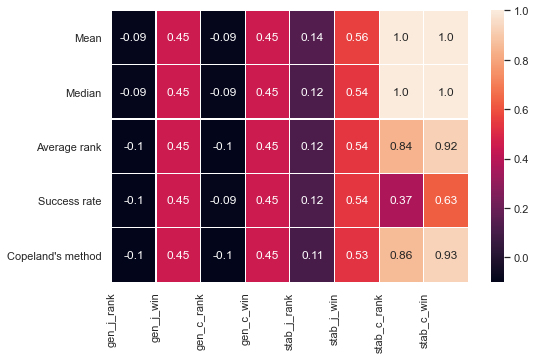

In [81]:
# Without Artificial benchmark
#da_names.remove('Artificial')
#da_names.append('Artificial')
table = [gen_j_rank, gen_j_win, gen_c_rank, gen_c_win, stab_j_rank, stab_j_win, stab_c_rank, stab_c_win]
table = [drop_methods(m) for m in table]
#table = pd.DataFrame([np.mean([np.mean(df[df['name'] == name].drop(['name'], axis=1), axis=1) for name in da_names], axis=0) for df in table])
# Only on one benchmark
table = pd.DataFrame([np.mean(df[df['name'] == 'Artificial'].drop(['name'], axis=1), axis=1) for df in table])
table.index = ['gen_j_rank', 'gen_j_win', 'gen_c_rank', 'gen_c_win', 'stab_j_rank', 'stab_j_win', 'stab_c_rank', 'stab_c_win']
table.columns = ['Mean', 'Median', 'Average rank', 'Success rate', "Copeland's method"]
table = table.T
for i in range(len(table.columns)):
    if i%2 != 0: # reverse winner distance
        table[table.columns[i]] = 1 - table[table.columns[i]]
table = table.round(2)
rk.show(table, annot=True, size=1)

In [23]:
# OLD
#folder = '../data/ranking_esann/results'
#da_names = ['AutoDL-AUC', 'AutoDL-ALC', 'AutoML', 'Artificial', 'OpenML-Alors', 'Statlog']
#all_df = []

#for da_name in da_names:
#    for metric in ['kendalltau']: #['spearman', 'kendalltau']:
#        # read file
#        df = pd.read_csv(os.path.join(folder, 'loo_'+metric+'_'+da_name+'.csv'), header=None, index_col=0)
#        # processing
#        _, sorted_columns = zip(*sorted(zip(df.mean(axis=0), df.columns)))
#        sorted_columns = list(sorted_columns)
#        df = df[sorted_columns]
#        # store
#        all_df.append(df)

##### W vs Generalization

Text(0, 0.5, 'Generalization')

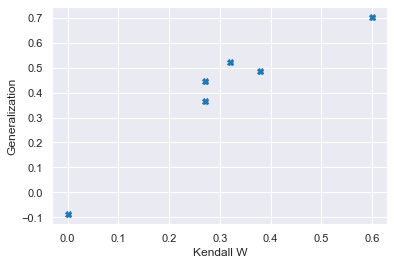

In [766]:
kends = [0.38, 0.6, 0.27, 0.0, 0.32, 0.27]
ttest = np.mean([gen_j_rank[gen_j_rank['name'] == name].drop(['name'], axis=1) for name in da_names], axis=2)
y = np.mean(ttest, axis=1)
plt.plot(kends, y, 'X')
plt.xlabel('Kendall W')
plt.ylabel('Generalization')